<h1>Marriage Eligibility Predictor</h1>

<H5>This dataset is self created i.e. typed manually for experimentation with machine learning algorithms . </H5>

<h5>Dataset consists of five columns : Name , Country , age , gender , eligibility . It contains data of 169 people acorss countries like India , Japan , South Korea , US , China and Germany.  </h5>

In [38]:
pip install scikit-learn==1.5.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   - --------------------------

<h4>importing required modules</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


<h4>Reading datafile</h4>

In [2]:
df=pd.read_csv("marriagedata.csv")

In [3]:
df.shape

(169, 5)

In [6]:
df.head(20)

,NAME,COUNTRY,AGE,GENDER,ELIGIBILTY
0,AYUSH TIWARI,INDIA,20,MALE,NO
1,HA JUN,SOUTH KOREA,45,MALE,YES
2,SARAH,US,30,FEMALE,YES
3,CAREL,GERMANY,18,MALE,YES
4,FANG,CHINA,20,FEMALE,YES
5,MAYANK DEV SINGH,INDIA,54,MALE,YES
6,AKARI,JAPAN,16,FEMALE,YES
7,RIYA SHARMA,INDIA,23,FEMALE,YES
8,ELIZABETH,US,18,FEMALE,YES
9,AIKO,JAPAN,18,FEMALE,YES


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAME        169 non-null    object
 1   COUNTRY     169 non-null    object
 2   AGE         169 non-null    int64 
 3   GENDER      169 non-null    object
 4   ELIGIBILTY  169 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.7+ KB


In [21]:
df.describe()

,AGE
count,169.000000
mean,35.846154
std,27.158924
min,10.000000
25%,16.000000
50%,21.000000
75%,56.000000
max,100.000000


In [22]:
(df.isnull() | df.empty | df.isna()).sum()

NAME          0
COUNTRY       0
AGE           0
GENDER        0
ELIGIBILTY    0
dtype: int64

In [11]:
### Data contains no missing values

In [23]:
print(list(df["COUNTRY"].unique()))

['INDIA', 'SOUTH KOREA', 'US', 'GERMANY', 'CHINA', 'JAPAN']


<h4>Visualizing the data</h4>

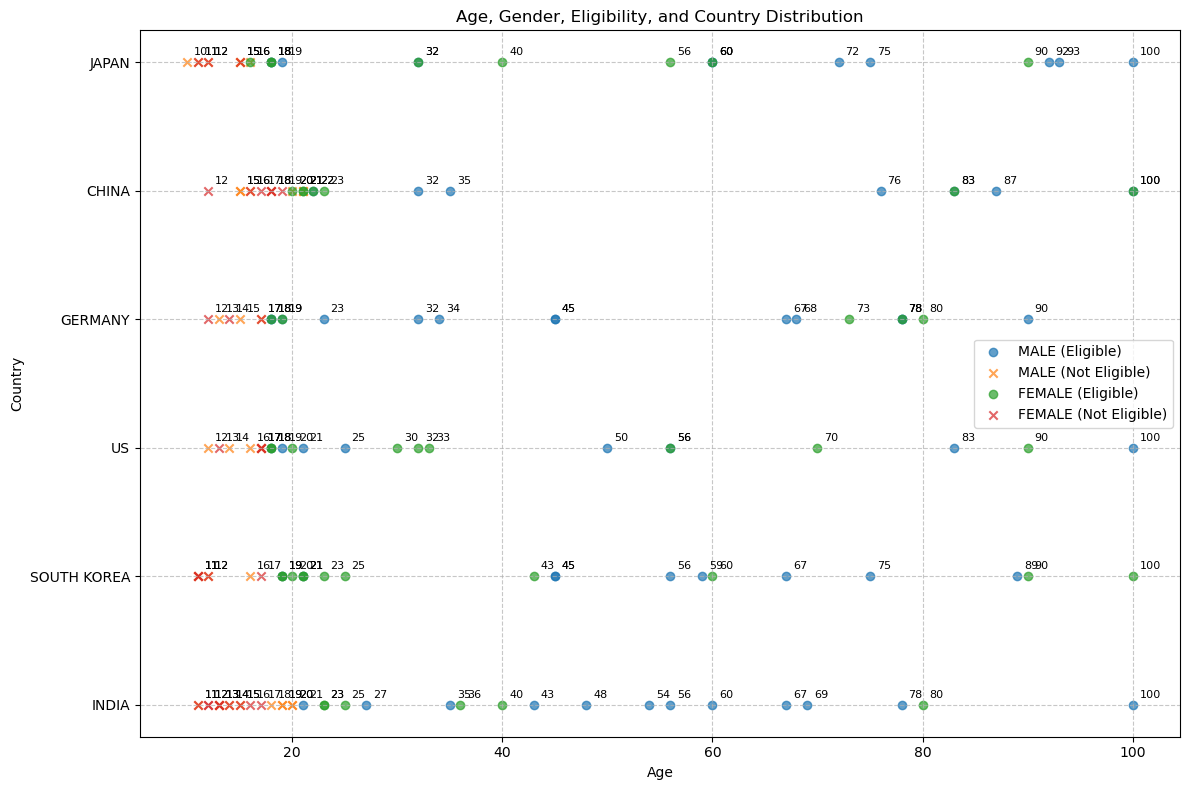

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


unique_countries = df['COUNTRY'].unique()
country_to_num = {country: i for i, country in enumerate(unique_countries)}

# Convert countries to numeric values
df['country_num'] = df['COUNTRY'].map(country_to_num)

# Create the scatter plot
plt.figure(figsize=(12, 8))


for gender in df['GENDER'].unique():
    mask = df['GENDER'] == gender
    eligible = df.loc[mask, 'ELIGIBILTY'] == 'YES'
    
    plt.scatter(df.loc[mask & eligible, 'AGE'], df.loc[mask & eligible, 'country_num'], 
                marker='o', label=f'{gender} (Eligible)', alpha=0.7)
    plt.scatter(df.loc[mask & ~eligible, 'AGE'], df.loc[mask & ~eligible, 'country_num'], 
                marker='x', label=f'{gender} (Not Eligible)', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Country')
plt.yticks(range(len(unique_countries)), unique_countries)
plt.title('Age, Gender, Eligibility, and Country Distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


for _, row in df.iterrows():
    plt.annotate(str(row['AGE']), (row['AGE'], row['country_num']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

<h5>We can see that in most of countries people below 18 are ineligible to marry though this number differs a bit according to gender</h5>

<h4>Preprocessing the data</h4>

In [10]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['AGE']),
        ('cat', OneHotEncoder(drop='first'), ['COUNTRY', 'GENDER']),
        
    ])


<h3>Model building and evaluation</h3>

In [11]:
from sklearn.model_selection import train_test_split
x = df.drop(["NAME", "ELIGIBILTY"], axis=1)
y = df["ELIGIBILTY"]
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.30,random_state=42)
X_train_processed = preprocessor.fit_transform(xTrain)

# Transform the test data
X_test_processed = preprocessor.transform(xTest)



<h3>Decision tree</h3>

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,criterion='gini')
dt.fit(X_train_processed, yTrain)
y_pred = dt.predict(X_test_processed)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(yTest, y_pred)*100)
print("\nClassification Report:\n", classification_report(yTest, y_pred))

Accuracy: 86.27450980392157

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      0.67      0.80        21
         YES       0.81      1.00      0.90        30

    accuracy                           0.86        51
   macro avg       0.91      0.83      0.85        51
weighted avg       0.89      0.86      0.86        51



<h3>Random Forest Classifier</h3>

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=50)
rf.fit(X_train_processed, yTrain)

# Make predictions
y_pred = rf.predict(X_test_processed)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(yTest, y_pred)*100)
print("\nClassification Report:\n", classification_report(yTest, y_pred))

Accuracy: 96.07843137254902

Classification Report:
               precision    recall  f1-score   support

          NO       0.91      1.00      0.95        21
         YES       1.00      0.93      0.97        30

    accuracy                           0.96        51
   macro avg       0.96      0.97      0.96        51
weighted avg       0.96      0.96      0.96        51



<h3>AdaBoost Classifier</h3>

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
adaboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
adaboost_pipeline.fit(xTrain, yTrain)
y_pred = adaboost_pipeline.predict(xTest)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(yTest, y_pred)*100)
print("\nClassification Report:\n", classification_report(yTest, y_pred))

Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00        21
         YES       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [14]:
### we are getting 100% accuracy from adaboost classifier . So we will use it for our final model

<h3>Exporting the model</h3>

In [9]:
import pickle


with open('df1.pkl', 'wb') as file:
    pickle.dump(df, file)

with open('pipe1.pkl', 'wb') as file:
    pickle.dump(adaboost_pipeline, file)  